<a href="https://colab.research.google.com/github/deftydev/Deep-Learning/blob/main/tyre_cnn_and_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [9]:
!kaggle datasets download -d warcoder/tyre-quality-classification

100% 2.66G/2.66G [02:43<00:00, 12.0MB/s]
100% 2.66G/2.66G [02:43<00:00, 17.5MB/s]


In [12]:
import zipfile
zip_ref=zipfile.ZipFile('/content/tyre-quality-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [14]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/Digital images of defective and good condition tyres',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)


Found 1856 files belonging to 2 classes.


In [15]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)

In [16]:
model=Sequential()

In [17]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train_ds,epochs=10)

Epoch 1/10
58/58 [==============================] - 54s 800ms/step - loss: 0.8291 - accuracy: 0.5830
Epoch 2/10
58/58 [==============================] - 52s 772ms/step - loss: 0.5997 - accuracy: 0.6740
Epoch 3/10
58/58 [==============================] - 73s 1s/step - loss: 0.5615 - accuracy: 0.7123
Epoch 4/10
58/58 [==============================] - 54s 814ms/step - loss: 0.5063 - accuracy: 0.7478
Epoch 5/10
58/58 [==============================] - 51s 762ms/step - loss: 0.4453 - accuracy: 0.7796
Epoch 6/10
58/58 [==============================] - 51s 755ms/step - loss: 0.4011 - accuracy: 0.8044
Epoch 7/10
58/58 [==============================] - 51s 748ms/step - loss: 0.3436 - accuracy: 0.8314
Epoch 8/10
58/58 [==============================] - 50s 731ms/step - loss: 0.3252 - accuracy: 0.8481
Epoch 9/10
58/58 [==============================] - 50s 737ms/step - loss: 0.3136 - accuracy: 0.8508
Epoch 10/10
58/58 [==============================] - 50s 737ms/step - loss: 0.2173 - accuracy:

In [22]:
import matplotlib.pyplot as plt

In [52]:
image= cv2.imread("/content/Digital images of defective and good condition tyres/good/good (184).jpg")

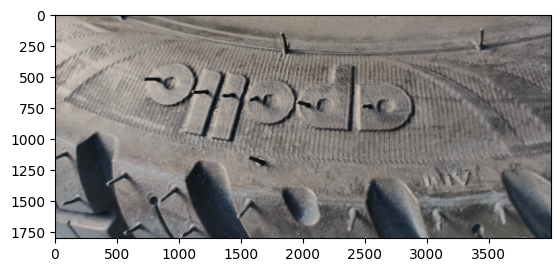

In [53]:
plt.imshow(image)

In [54]:
image.shape

(1800, 4000, 3)

In [55]:
import cv2
img_resize=cv2.resize(image,(256,256))

In [56]:
img_input=img_resize.reshape((1,256,256,3))

In [57]:
model.predict(img_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

model assign 0 to defective and 1 to good based on their sequence present , so in above we have provided good tyre so it is predicting correctly with 1 as output


In [58]:
model.save("/content/tyre.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


saving the model

DATA AUGMENTATION

In [59]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [60]:
input_image= cv2.imread("/content/Digital images of defective and good condition tyres/good/good (184).jpg")

In [61]:
type(input_image)

numpy.ndarray

In [64]:
myimg=image.load_img(r"/content/Digital images of defective and good condition tyres/good/good (184).jpg",target_size=(250,250))

In [65]:
type(myimg) #this will not give you numpy array

PIL.Image.Image

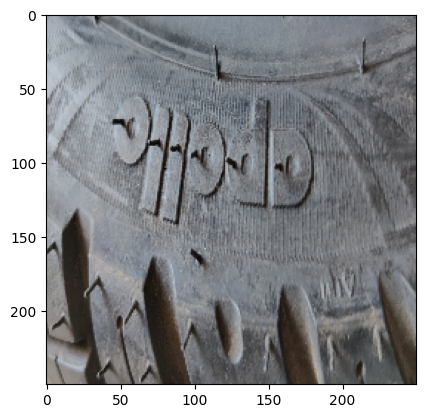

In [66]:
plt.imshow(myimg)

In [67]:
image= image.img_to_array(myimg)

In [68]:
type(image) #Now you converting to numpy array

numpy.ndarray

In [69]:
datagen=ImageDataGenerator(
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [70]:
input_image=image.reshape(1,250,250,3)

make new folder named augmented_image and create your augmented images

In [73]:
i=0
for output in datagen.flow(input_image,save_to_dir="/content/augmented_image"):
  i=i+1

  if i==5:
    break

To create the images directly from the directory which contain all images

In [74]:
train_datagen=ImageDataGenerator(
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255
)

In [92]:
train_genrator=train_datagen.flow_from_directory(
    "/content/Digital images of defective and good condition tyres",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
)

Found 1856 images belonging to 2 classes.


In [ ]:
# test_datagen=ImageDataGenerator(
#     rescale=1./255
# )

In [ ]:
# test_genrator=test_datagen.flow_from_directory(
#     "/content/drive/MyDrive/cat-dog/test_set",
#     target_size=(150,150),
#     batch_size=15,
#     class_mode="binary"
# )

In [94]:
model=Sequential()

In [95]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 128)      

In [97]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
model.fit_generator(train_genrator,epochs=1)

<ipython-input-98-b4bf4a613735>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_genrator,epochs=1)


124/124 [==============================] - 94s 737ms/step - loss: 0.6701 - accuracy: 0.6164
